<a href="https://colab.research.google.com/github/fernanda0402/Doutorado/blob/main/Eq_do_Contraste_(usando_pyccl).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Outra forma de plotar o contraste $\delta_m$ é usar a biblioteca pyccl do Python, voltada para cálculos da Cosmologia. Porém, como esta biblioteca não tem no colab, é necessário instalar através do comando abaixo.

In [1]:
# Bibliotecas:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp

In [2]:
!pip install -q condacolab
import condacolab
condacolab.install()
!mamba install pyccl

✨🍰✨ Everything looks OK!

                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.1.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['pyccl']

conda-forge/linux-64                                        Usin

In [3]:
import pyccl as ccl

In [4]:
cosmo = ccl.Cosmology(
    Omega_c=0.2656, Omega_b=0.0494, h=0.6727, sigma8=0.8120, n_s=0.9649) 


a = np.linspace(0.2, 1, 1000)  # fator de escala
delta = ccl.growth_factor(cosmo, a)  # contraste

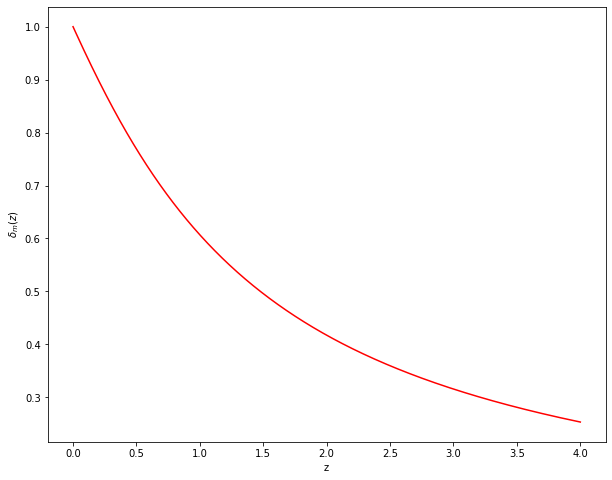

In [11]:
# definindo o redshift em função do fator de escala
z = (1/a) - 1.

# plotando o gráfico de delta x z
plt.figure(figsize=(10, 8))
plt.xlabel('z')
plt.ylabel('$\delta_m(z)$')
plt.plot(z, delta, color='red')
plt.show()

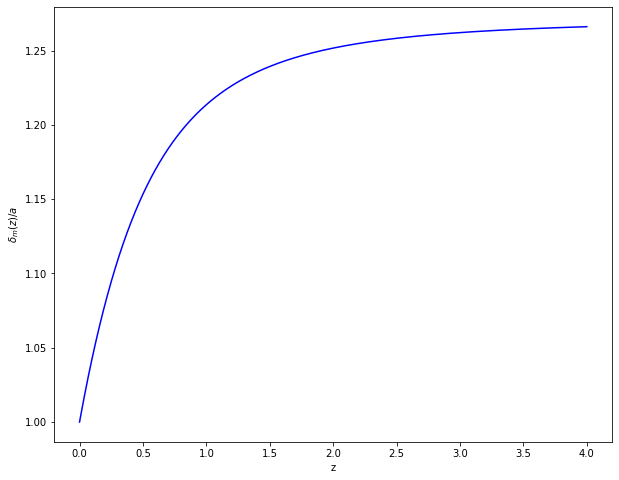

In [13]:
# agora vamos plotar a função g(a) = delta/a (aparece no artigo de Linder e Cahn)
g = delta/a

# agora vamos plotar a função g(a) = delta/a

plt.figure(figsize=(10, 8))
plt.xlabel('z')
plt.ylabel('$\delta_m(z)/a$')
plt.plot(z, g, color='blue')
plt.show()

Porém, $\delta_m$ não é um observável. Como queremos comparar os modelos alternativos com dados, precisamos da função $f$, defininda como:

$f(a) = \frac{d ln(\delta_m)}{d ln(a)}$.

Este parâmetro é um observável cosmológico e é chamado de função taxa de crescimento de estruturas.

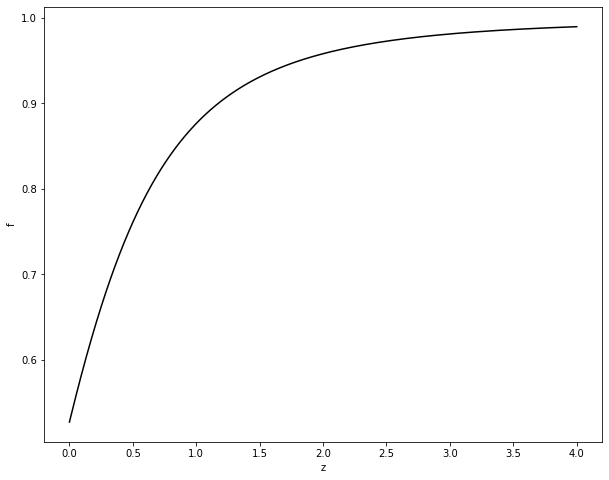

In [15]:
# definindo f com a biblioteca pyccl
f = ccl.background.growth_rate(cosmo, a)

# plotando f
plt.figure(figsize=(10, 8))
plt.xlabel('z')
plt.ylabel('f')
plt.plot(z, f, color='black')
plt.show()

Agora, vamos comparar a função taxa de crescimento $f$ com a função $g$.

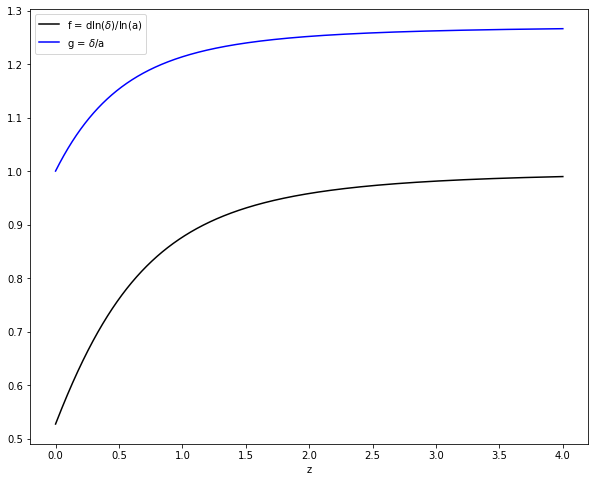

In [17]:
plt.figure(figsize=(10, 8))
plt.xlabel('z')
plt.plot(z, f, color='black', label='f = dln($\delta$)/ln(a)')
plt.plot(z, g, color='blue', label='g = $\delta$/a')
plt.legend()
plt.show()